**kalın metin**

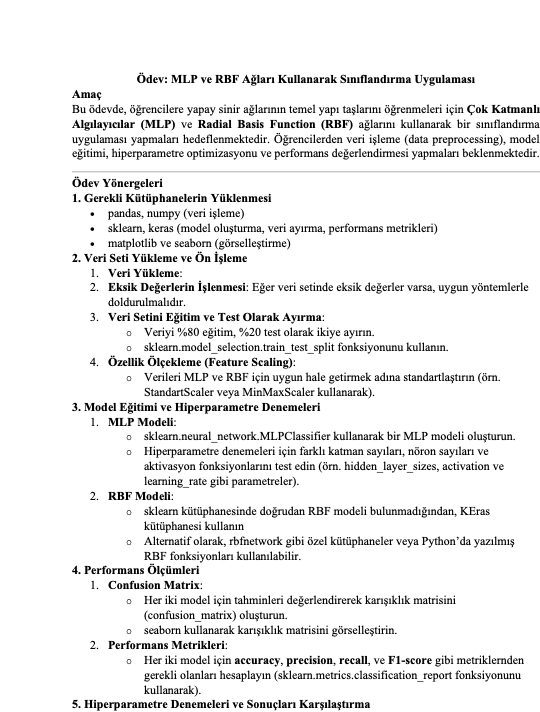

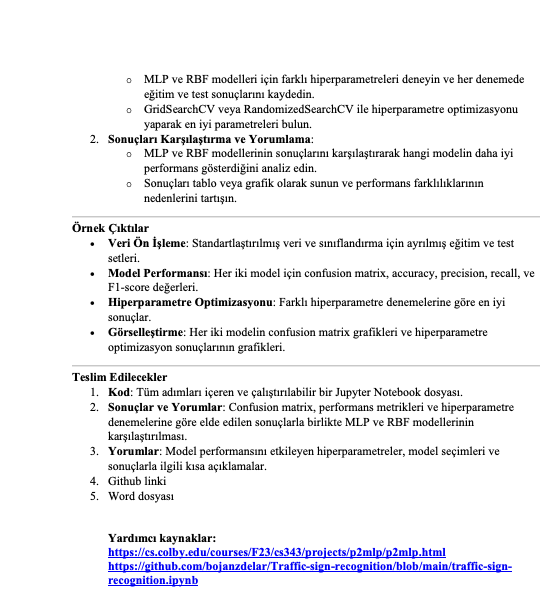

# **MLP MODELİ**

# Importing Necessary Libraries

In [21]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout,LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import Precision, Recall,Accuracy
from keras import optimizers
import cv2
import keras
from sklearn.decomposition import PCA
from keras.optimizers import RMSprop, Adam, Nadam


In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
# Change from matrix to array --> dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# **MISSING VALUE ANALYSIS**

In [24]:
# Combine train and test set
combined_data = np.concatenate([x_train, x_test])
combined_data = pd.DataFrame(combined_data)

# Check missing values
missing_values = combined_data.isnull().sum().sum()

if missing_values > 0:
    print(f"MNIST veri setinde {missing_values} adet eksik değer var.")
else:
    print("MNIST veri setinde eksik değer bulunamadı.")

MNIST veri setinde eksik değer bulunamadı.


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Çıktı
print(f"x_train şekli: {x_train.shape}")
print(f"x_test şekli: {x_test.shape}")
print(f"y_train şekli: {y_train.shape}")
print(f"y_test şekli: {y_test.shape}")

x_train şekli: (48000, 784)
x_test şekli: (12000, 784)
y_train şekli: (48000,)
y_test şekli: (12000,)


# **PREPROCESSING DATA**

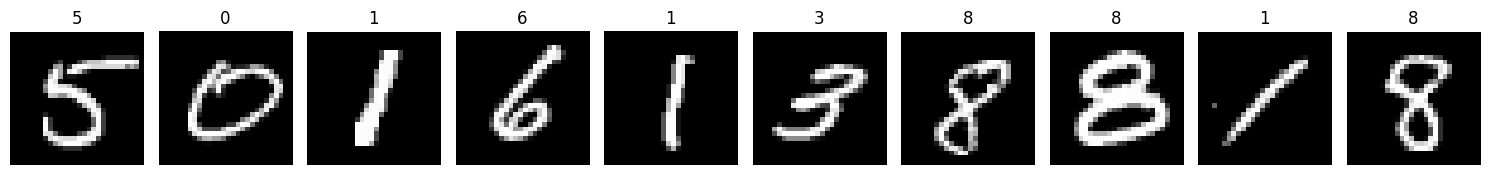

In [26]:
# İlk 10 görüntüyü seç ve yeniden boyutlandır
images = x_train[:10].reshape(-1, 28, 28)  # İlk 10 görüntü, her biri 28x28
labels = y_train[:10]  # İlk 10 etiket

# Yan yana görsel oluştur
fig, axes = plt.subplots(1, 10, figsize=(15, 3))  # 1 satır, 10 sütun
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")  # Gri tonlamada görüntü göster
    ax.set_title(f"{labels[i]}")  # Üzerine etiketi ekle
    ax.axis("off")  # Eksenleri gizle

plt.tight_layout()
plt.show()

In [27]:
batch_size = 256
num_classes = 10
epochs = 5

In [28]:
#one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# **BUILDING THE MODEL**

In [45]:
import tensorflow as tf
from tensorflow.keras import backend as K

# F1 metriği tanımlanıyor
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [46]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(num_classes, activation='softmax'))
model.summary()
nadam=keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),f1_score])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# **TRAINING MODEL**

In [47]:
MLP_model_1 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8474 - f1_score: 0.6760 - loss: 0.5165 - precision_11: 0.9231 - recall_10: 0.7639 - val_accuracy: 0.9613 - val_f1_score: 0.9184 - val_loss: 0.1309 - val_precision_11: 0.9706 - val_recall_10: 0.9533
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9609 - f1_score: 0.9290 - loss: 0.1231 - precision_11: 0.9690 - recall_10: 0.9556 - val_accuracy: 0.9713 - val_f1_score: 0.9431 - val_loss: 0.0924 - val_precision_11: 0.9761 - val_recall_10: 0.9666
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9758 - f1_score: 0.9473 - loss: 0.0810 - precision_11: 0.9801 - recall_10: 0.9725 - val_accuracy: 0.9733 - val_f1_score: 0.9542 - val_loss: 0.0879 - val_precision_11: 0.9768 - val_recall_10: 0.9702
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9823 - f1_score: 0.9565 - loss: 0.0563 - precision_11: 0.9848 - recall_10: 0.9799 - val_accuracy: 0.9769 - val_f1_score: 0.9608 - val_loss: 0

In [48]:
score_1= model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])
print('Test precision:', score_1[2])
print('Test recall:', score_1[3])
print('Test F1_Score:', score_1[4])

Test loss: 0.08431636542081833
Test accuracy: 0.9825833439826965
Test precision: 0.9836448431015015
Test recall: 0.9823333621025085
Test F1_Score: 0.9816771745681763


In [49]:
import tensorflow as tf
from tensorflow.keras import backend as K

# F1 metriği tanımlanıyor
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [50]:
model_2 = Sequential()
model_2.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='sigmoid'))
model_2.add(Dropout(0.2))



model_2.add(Dense(num_classes, activation='sigmoid'))
model_2.summary()
nadam=keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),f1_score])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
batch_size = 512
num_classes = 10
epochs = 10

In [52]:
MLP_model_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4261 - f1_score: 0.2030 - loss: 1.7702 - precision_13: 0.1287 - recall_12: 0.9040 - val_accuracy: 0.8829 - val_f1_score: 0.2638 - val_loss: 0.4314 - val_precision_13: 0.1795 - val_recall_12: 0.9951
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8797 - f1_score: 0.2729 - loss: 0.4175 - precision_13: 0.1809 - recall_12: 0.9965 - val_accuracy: 0.9117 - val_f1_score: 0.2852 - val_loss: 0.3023 - val_precision_13: 0.1825 - val_recall_12: 0.9970
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9027 - f1_score: 0.2882 - loss: 0.3247 - precision_13: 0.1833 - recall_12: 0.9971 - val_accuracy: 0.9226 - val_f1_score: 0.2935 - val_loss: 0.2588 - val_precision_13: 0.1854 - val_recall_12: 0.9973
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9181 - f1_score: 0.2952 - loss: 0.2778 - precision_13: 0.1862 - recall_12: 0.9974 - val_accuracy: 0.9297 - val_f1_score: 0.2987 - val_loss: 0.2345 - 

In [53]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])
print('Test precision:', score_2[2])
print('Test recall:', score_2[3])
print('Test F1_Score:', score_2[4])

Test loss: 0.13492777943611145
Test accuracy: 0.9585833549499512
Test precision: 0.20587527751922607
Test recall: 0.9992499947547913
Test F1_Score: 0.3163260519504547


Model 2'nin test doğruluğu oldukça yüksek (%95.86).
Recall değeri (%99.92), pozitif sınıfı tespit etme konusunda mükemmel bir başarıya işaret ediyor.


Precision'ın düşük (%20.59) olması, pozitif tahminlerin büyük bir kısmının yanlış olduğunu gösteriyor. Bu durum, modelin yanlış pozitiflere (false positive) çok eğilimli olduğunu gösterir.
Düşük F1-Skoru (%31.63), precision ve recall arasındaki dengesizliğin genel performansı olumsuz etkilediğini gösteriyor.

In [54]:
import tensorflow as tf
from tensorflow.keras import backend as K

# F1 metriği tanımlanıyor
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [55]:
model_3 = Sequential()
model_3.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(512, activation='sigmoid'))
model_3.add(Dropout(0.2))
model_3.add(Dense(128)) # hidden layer
model_3.add(LeakyReLU(alpha=0.1))



model_3.add(Dense(num_classes, activation='sigmoid'))
model_3.summary()
nadam=keras.optimizers.Adam(learning_rate=0.001)



# Modelin compile edilmesi
model_3.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_score])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,530 (2.79 MB)

 Trainable params: 731,530 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
batch_size = 64
num_classes = 10
epochs = 15

In [57]:
MLP_model_3 = model_3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1895 - f1_score: 0.0279 - loss: 0.0891 - precision_15: 0.3825 - recall_14: 0.0302 - val_accuracy: 0.7053 - val_f1_score: 0.2512 - val_loss: 0.0478 - val_precision_15: 0.9106 - val_recall_14: 0.4408
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7261 - f1_score: 0.3584 - loss: 0.0439 - precision_15: 0.8454 - recall_14: 0.5267 - val_accuracy: 0.8484 - val_f1_score: 0.5440 - val_loss: 0.0252 - val_precision_15: 0.8722 - val_recall_14: 0.7906
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8505 - f1_score: 0.5907 - loss: 0.0250 - precision_15: 0.8905 - recall_14: 0.7815 - val_accuracy: 0.8923 - val_f1_score: 0.6667 - val_loss: 0.0177 - val_precision_15: 0.9179 - val_recall_14: 0.8557
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8763 - f1_score: 0.6888 - loss: 0.0200 - precision_15: 0.9056 - recall_14: 0.8321 - val_accuracy: 0.9043 - val_f1_score: 0.7285 - val_loss: 0.

In [58]:

score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])
print('Test precision:', score_3[2])
print('Test recall:', score_3[3])
print('Test F1_Score:', score_3[4])

Test loss: 0.009044409729540348
Test accuracy: 0.9432500004768372
Test precision: 0.9544329643249512
Test recall: 0.9320833086967468
Test F1_Score: 0.8749431371688843


Eğitim ve Test doğruluk oranlarının birlikte arttığı ve Loss oranlarının da birlikte azaldığı grafikte gözlemlemektedir. Modelimiz başarılı olduğunu başarı oranının hiperparametre tuning işlemleriyle birlikte %90 larda seyrettiğini söyleyebiliriz. 5 epoch'tan sonra doğrular benzer şekilde seyrettiği için epoch sayısını arttırmanın bu model için gereksiz olduğu yorumunu yapabiliriz.

3 modelde farklı Optimizer,Loss,Learning_Rate,Batch_Size,Epoch,Hidden Layer,Activation fonksiyonları kullanılmış olup ,farklı Accuracy,Precision ve Recall performans metrikleri elde edilmiştir . Başarı oranı en yüksek %97 ile ilk modelimizdir. Ancak bu başarı veri setinin türüne ,büyüklüğüne ve iş problemine göre değişebileceği unutulmamalıdır.

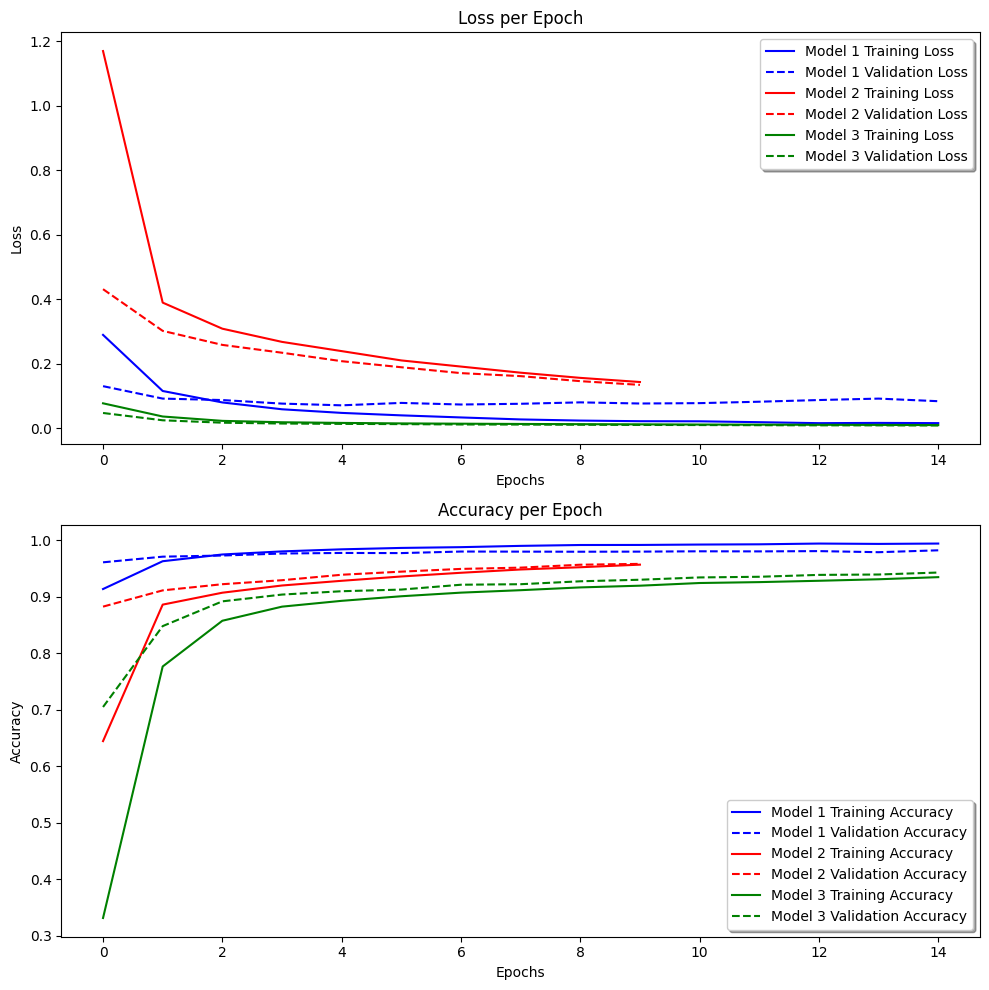

In [59]:
import matplotlib.pyplot as plt

# Her modelin fit sonucunu içeren bir liste (MLP_model_1, MLP_model_2, MLP_model_3 fit işlemlerinin sonuçları)
model_fits = [MLP_model_1, MLP_model_2, MLP_model_3]

# Renk ve çizgi stilleri tanımlıyoruz
colors = ['b', 'r', 'g']  # Her model için farklı renk
labels = ['Model 1', 'Model 2', 'Model 3']  # Model isimleri

# Grafik oluşturma
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Her modelin performansını çizmek için döngü
for i, fit_result in enumerate(model_fits):
    color = colors[i]
    label = labels[i]

    # Eğitim ve doğrulama kayıpları
    ax[0].plot(fit_result.history['loss'], color=color, linestyle='-', label=f"{label} Training Loss")
    ax[0].plot(fit_result.history['val_loss'], color=color, linestyle='--', label=f"{label} Validation Loss")

    # Eğitim ve doğrulama doğruluğu
    ax[1].plot(fit_result.history['accuracy'], color=color, linestyle='-', label=f"{label} Training Accuracy")
    ax[1].plot(fit_result.history['val_accuracy'], color=color, linestyle='--', label=f"{label} Validation Accuracy")

# Kayıp grafiği düzenlemeleri
ax[0].set_title('Loss per Epoch')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best', shadow=True)

# Doğruluk grafiği düzenlemeleri
ax[1].set_title('Accuracy per Epoch')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best', shadow=True)

# Grafik hizalama
plt.tight_layout()
plt.show()


Genel Gözlemler:


Model 1 (Mavi):

Eğitim doğruluğu (training accuracy) oldukça yüksek ve doğrulama doğruluğu (validation accuracy) da buna yakın bir seviyede.
Eğitim ve doğrulama doğruluğu arasında fazla bir fark yok. Bu durum, Model 1'in aşırı öğrenme (overfitting) yapmadığını ve genelleme yeteneğinin iyi olduğunu gösteriyor.


Model 2 (Kırmızı):

Model 2'nin doğrulama doğruluğu, eğitim doğruluğuna oldukça yakın.
Ancak doğrulama doğruluğu, Model 1'den biraz daha düşük kalmış. Bu, Model 2'nin performansının Model 1'e kıyasla biraz daha zayıf olduğunu gösteriyor.
Model 2'nin eğrisi de oldukça stabil görünüyor, yani eğitim sürecinde herhangi bir düzensizlik ya da sapma yok.Ancak F1 score ve Precision skorunun düşüklüğünü sorgulamamız gerekiyor.Sadece Accuracy oranına bakıp bir modelin optimal model olduğuna karar verememekteyiz.


Model 3 (Yeşil):

Model 3'ün eğitim doğruluğu hızla artmış, ancak doğrulama doğruluğu diğer modellere göre daha düşük kalmış.
Eğitim doğruluğu ile doğrulama doğruluğu arasında bir fark var, bu da Model 3'ün overfitting eğiliminde olduğunu işaret ediyor. Yani, Model 3 eğitim verisine fazla uyum sağlarken, test verisinde performansı düşüyor.
Bu model, genelleme yeteneği açısından diğer iki modele göre daha zayıf.
